# Cryptocurrency Time Series Forecasting

# Introduction

Time series is a sequence or series of data points in which the time component is involved throughout the occurrence and analyzing this time series data with certain tools and techniques is called time series analysis

We're going to visualize and predict price of Bitcoin

# Import Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import math
import datetime as dt

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import seaborn as sns
import matplotlib.pyplot as plt
from colorama import Fore

# Import Dataset

### Bitcoin

##### Bitcoin is a digital currency which operates free of any central control or the oversight of banks or governments. Instead it relies on peer-to-peer software and cryptography. A public ledger records all bitcoin transactions and copies are held on servers around the world

In [2]:
bitcoindf = pd.read_csv('../data/Bitcoin/BTC-USD.csv')
bitcoindf = bitcoindf.rename(columns = {'Date': 'date', 'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Adj Close': 'adj_close', 'Volume': 'volume'})
bitcoindf.head()

,date,open,high,low,close,adj_close,volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [3]:
bitcoindf.tail()

,date,open,high,low,close,adj_close,volume
3103,2023-03-17,25055.123047,27787.812500,24955.169922,27423.929688,27423.929688,50730261335
3104,2023-03-18,27448.117188,27725.953125,26636.261719,26965.878906,26965.878906,35723036817
3105,2023-03-19,26969.503906,28440.560547,26907.716797,28038.675781,28038.675781,37769448859
3106,2023-03-20,28041.601563,28527.724609,27242.880859,27767.236328,27767.236328,44774027664
3107,2023-03-21,27784.175781,27980.882813,27737.007813,27901.240234,27901.240234,43486908416


In [4]:
bitcoindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3108 entries, 0 to 3107
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       3108 non-null   object 
 1   open       3108 non-null   float64
 2   high       3108 non-null   float64
 3   low        3108 non-null   float64
 4   close      3108 non-null   float64
 5   adj_close  3108 non-null   float64
 6   volume     3108 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 170.1+ KB


In [5]:
bitcoindf.describe()

,open,high,low,close,adj_close,volume
count,3108.000000,3108.000000,3108.000000,3108.000000,3108.000000,3.108000e+03
mean,13096.781179,13425.026076,12735.317635,13104.064582,13104.064582,1.659776e+10
std,16053.437770,16463.398348,15582.630422,16050.543994,16050.543994,1.983912e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,705.644500,716.862014,699.745987,708.649520,708.649520,1.107655e+08
50%,7318.886231,7472.349366,7168.478515,7320.592774,7320.592774,8.724100e+09
75%,18626.545410,19164.787110,18012.107910,18656.615723,18656.615723,2.816265e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


# Preprocessing

##### Replace None or Null values with forward filling technique using fillna function

In [6]:
bitcoindf = bitcoindf.fillna(method = 'ffill')

##### Convert Date column into Datetime format

In [7]:
bitcoindf['date'] = pd.to_datetime(bitcoindf.date)
bitcoindf.head().style.set_properties(subset = ['date', 'close'], **{'background-color': 'skyblue'})

,date,open,high,low,close,adj_close,volume
0,2014-09-17 00:00:00,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18 00:00:00,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19 00:00:00,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20 00:00:00,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21 00:00:00,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


# Visualization

##### Plotting close price of Bitcoin

Text(0.5, 1.0, 'Bitcoin Close Price')

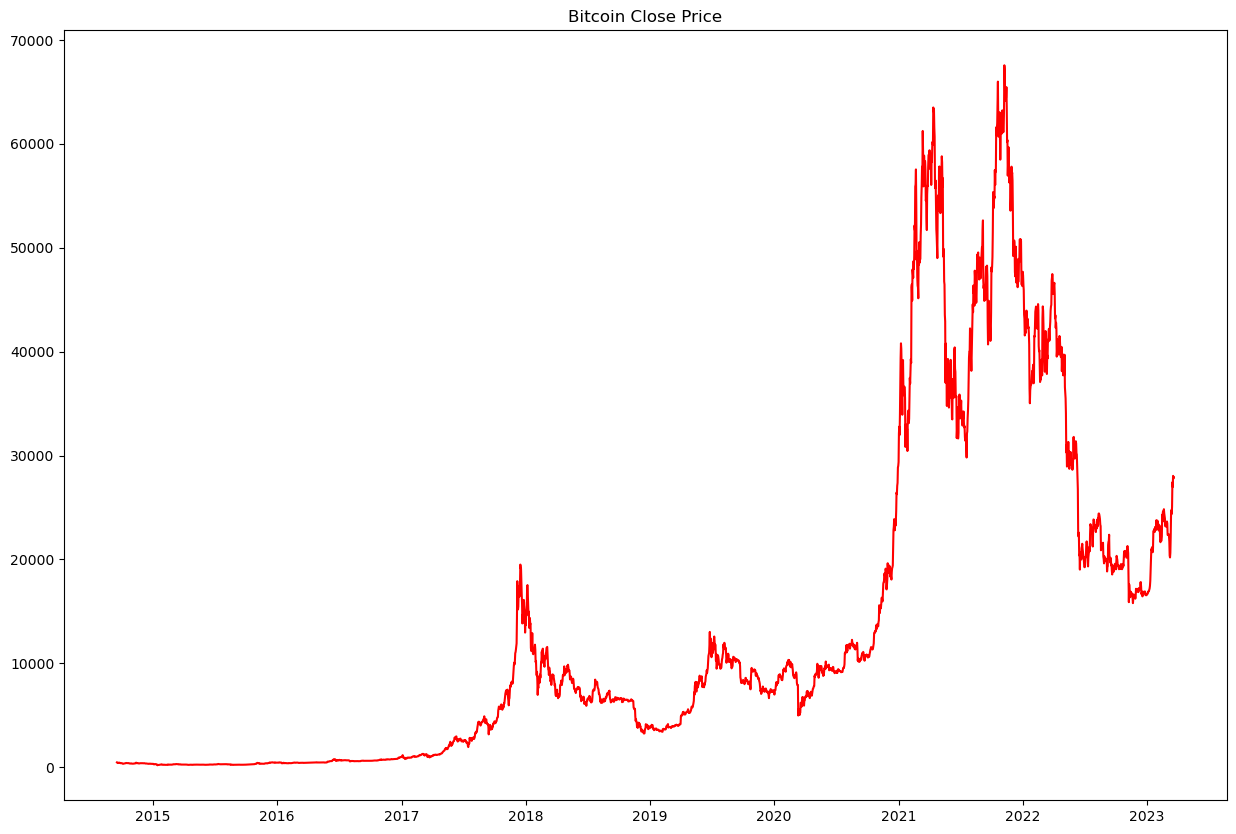

In [9]:
fig = plt.figure(figsize = (15, 10))

plt.plot(bitcoindf['date'], bitcoindf['close'], color = 'red')
plt.title('Bitcoin Close Price')

##### Plotting only 2022-2023 year close price of Bitcoin, Cardano, Dogecoin and Ethereum

In [10]:
last1year_bitcoindf = bitcoindf[bitcoindf['date'] > '03-2022']

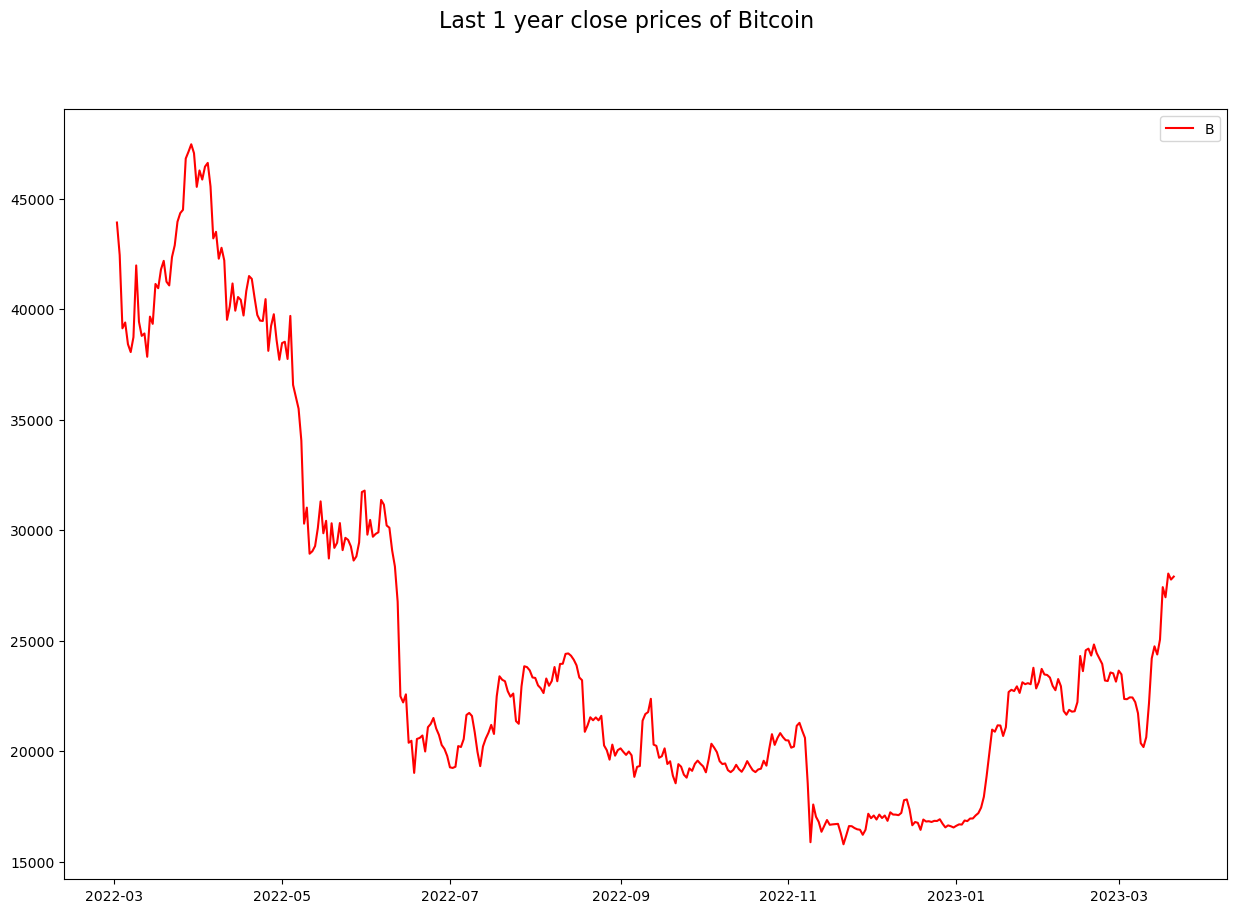

In [12]:
fig = plt.figure(figsize = (15, 10))
fig.suptitle('Last 1 year close prices of Bitcoin', fontsize = 16)

plt.plot(last1year_bitcoindf['date'], last1year_bitcoindf['close'], color = 'red')
plt.legend('B')

##### Plotting only 2020-2021 year volume of Bitcoin

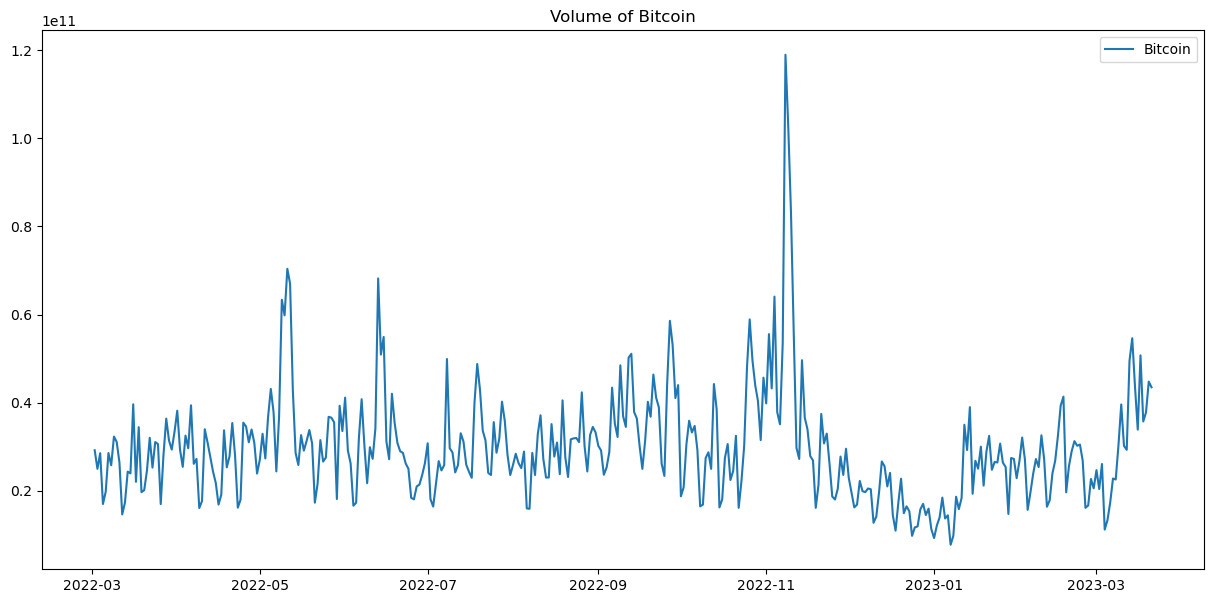

In [14]:
fig = plt.figure(figsize = (15, 7))

plt.plot(last1year_bitcoindf['date'], last1year_bitcoindf['volume'])
plt.title('Volume of Bitcoin')
plt.legend(['Bitcoin'])

##### Plotting last month open and close price of Bitcoin

In [15]:
last1month_bitcoindf = bitcoindf[bitcoindf['date'] > '02-2023']

/var/folders/g9/s15kjggj0bb9t_61f58dny800000gn/T/ipykernel_98535/933451971.py:6: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend('C', 'O')


Text(0.5, 1.0, 'Bitcoin')

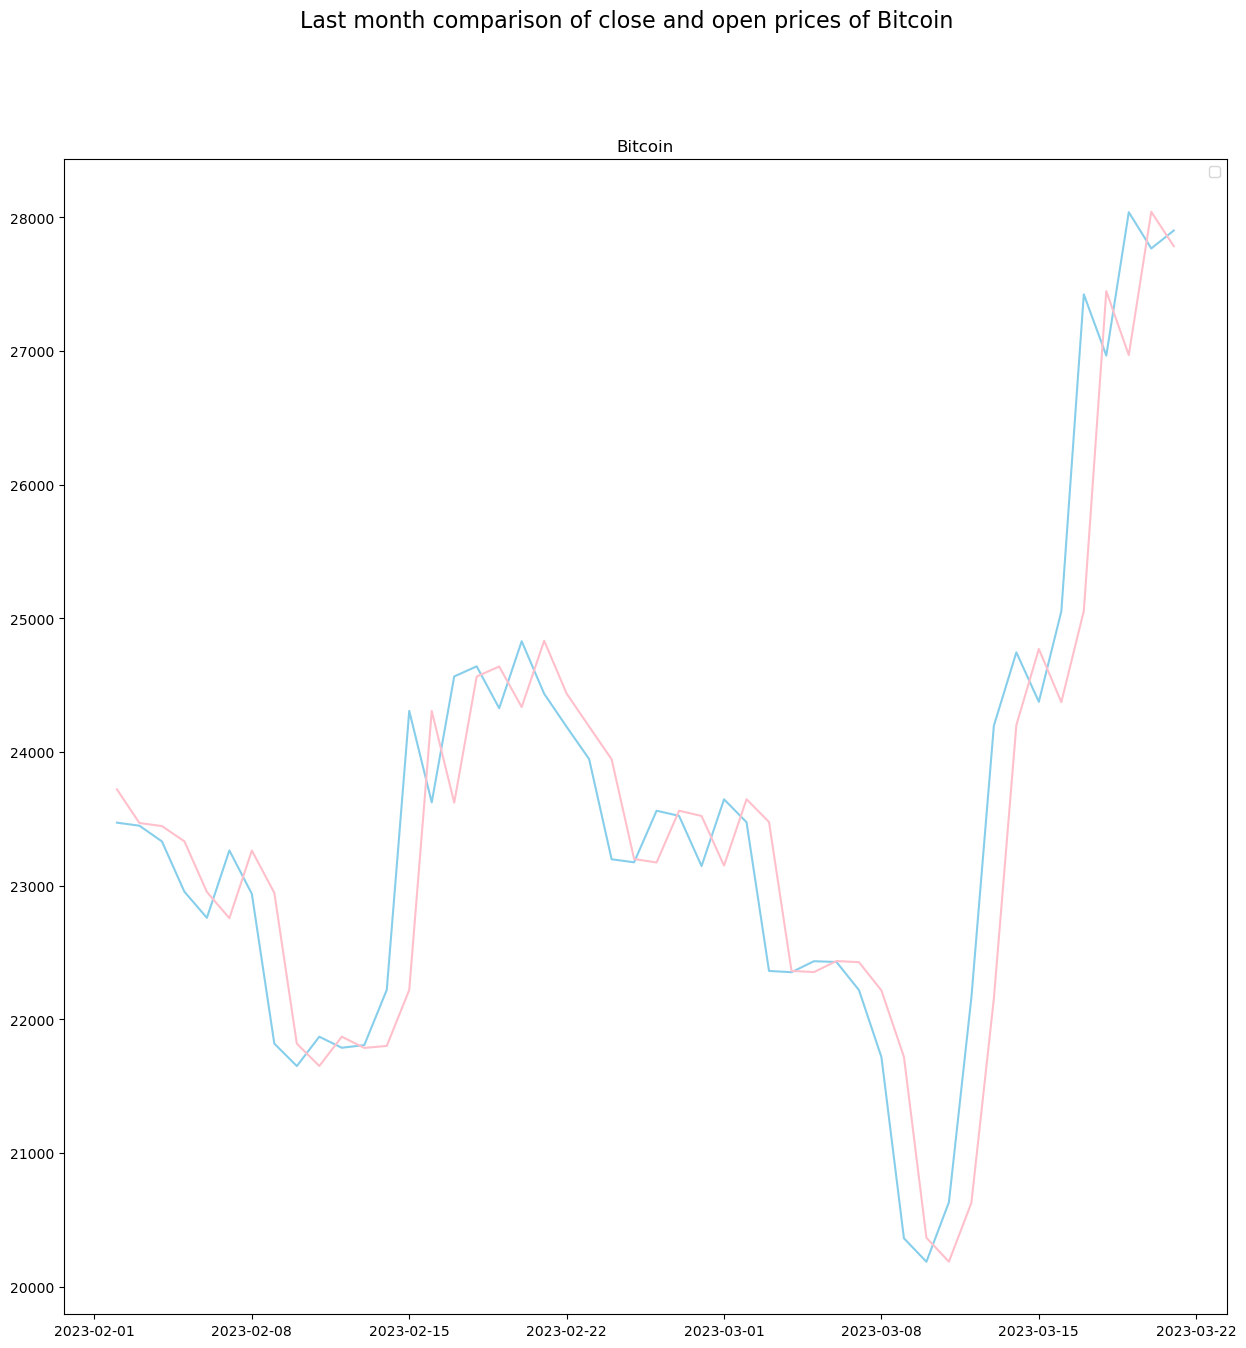

In [17]:
fig = plt.figure(figsize = (15, 15))
fig.suptitle('Last month comparison of close and open prices of Bitcoin', fontsize = 16)

plt.plot(last1month_bitcoindf['date'], last1month_bitcoindf['close'], color = 'skyblue')
plt.plot(last1month_bitcoindf['date'], last1month_bitcoindf['open'], color = 'pink')
plt.legend('C', 'O')
plt.title('Bitcoin')

### Moving Averages

##### As we know the stock prices are highly volatile and prices change quickly with time. To observe any trend or pattern we can take the help of a 50-day 200-day average.

Text(0.5, 1.0, 'Bitcoin Close Price moving average')

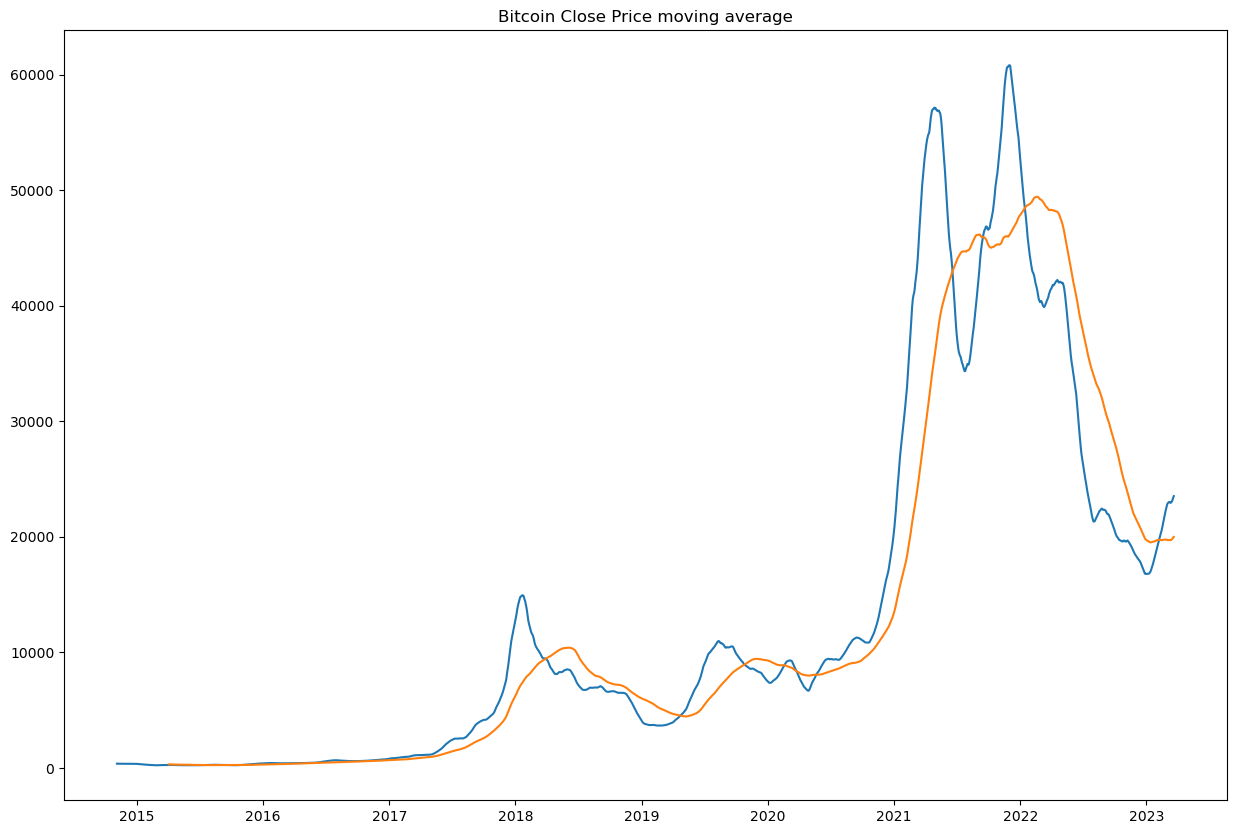

In [18]:
fig = plt.figure(figsize = (15, 10))

plt.plot(bitcoindf['date'], bitcoindf['close'].rolling(50).mean())
plt.plot(bitcoindf['date'], bitcoindf['close'].rolling(200).mean())
plt.title('Bitcoin Close Price moving average')

##### Plotting histogram with mean indicator of all four cryptocurrencies

Text(50000, 400, 'Bitcoin Close Price')

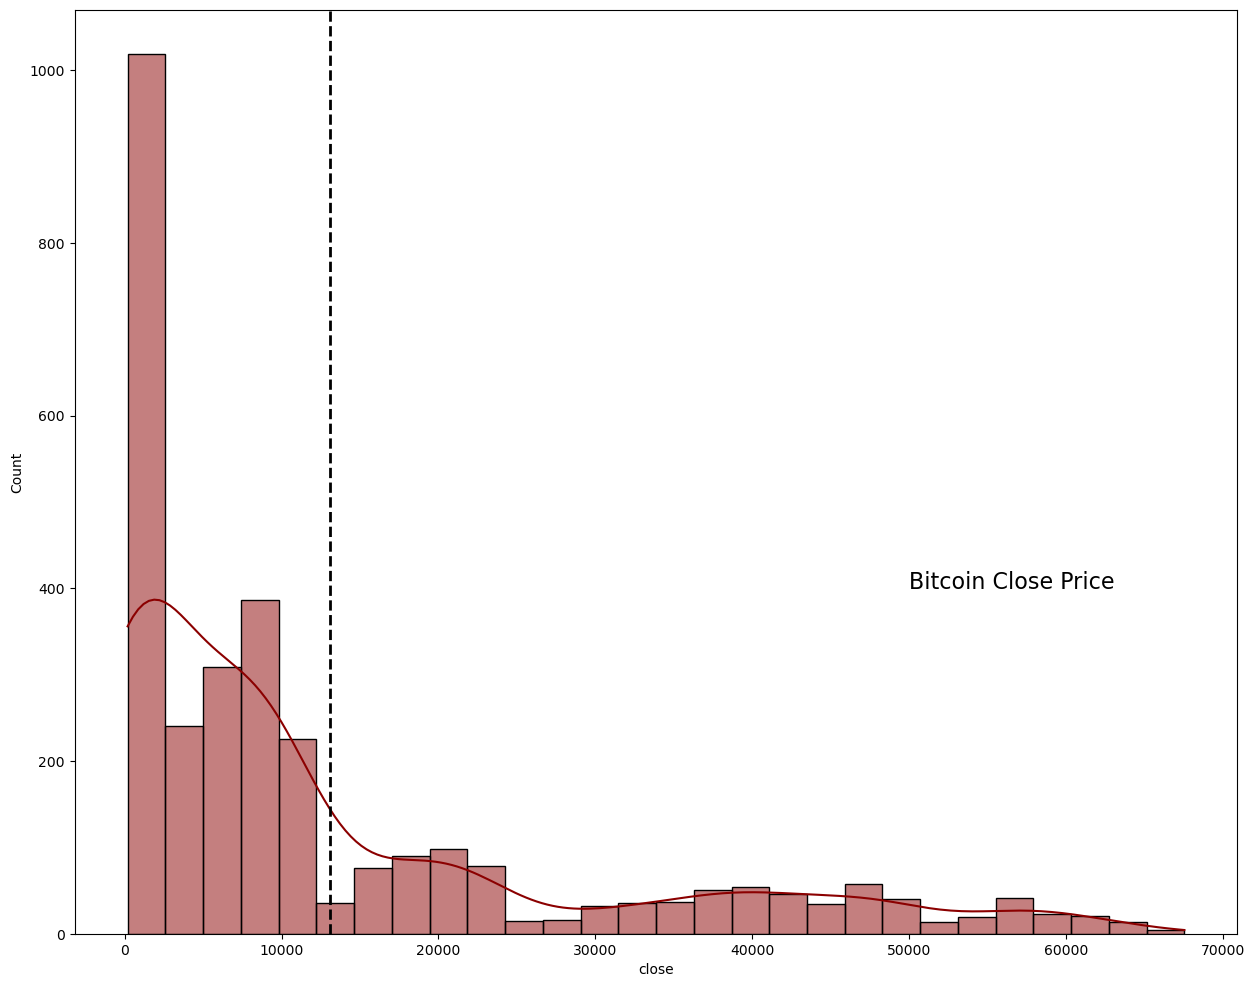

In [19]:
fig = plt.figure(figsize = (15, 12))

fig.tight_layout()

sns.histplot(bitcoindf['close'], color = 'darkred', kde = True)
plt.axvline(bitcoindf['close'].mean(), color = 'k', linestyle = 'dashed', linewidth = 2)
plt.text(50000, 400, 'Bitcoin Close Price', fontsize = 16)

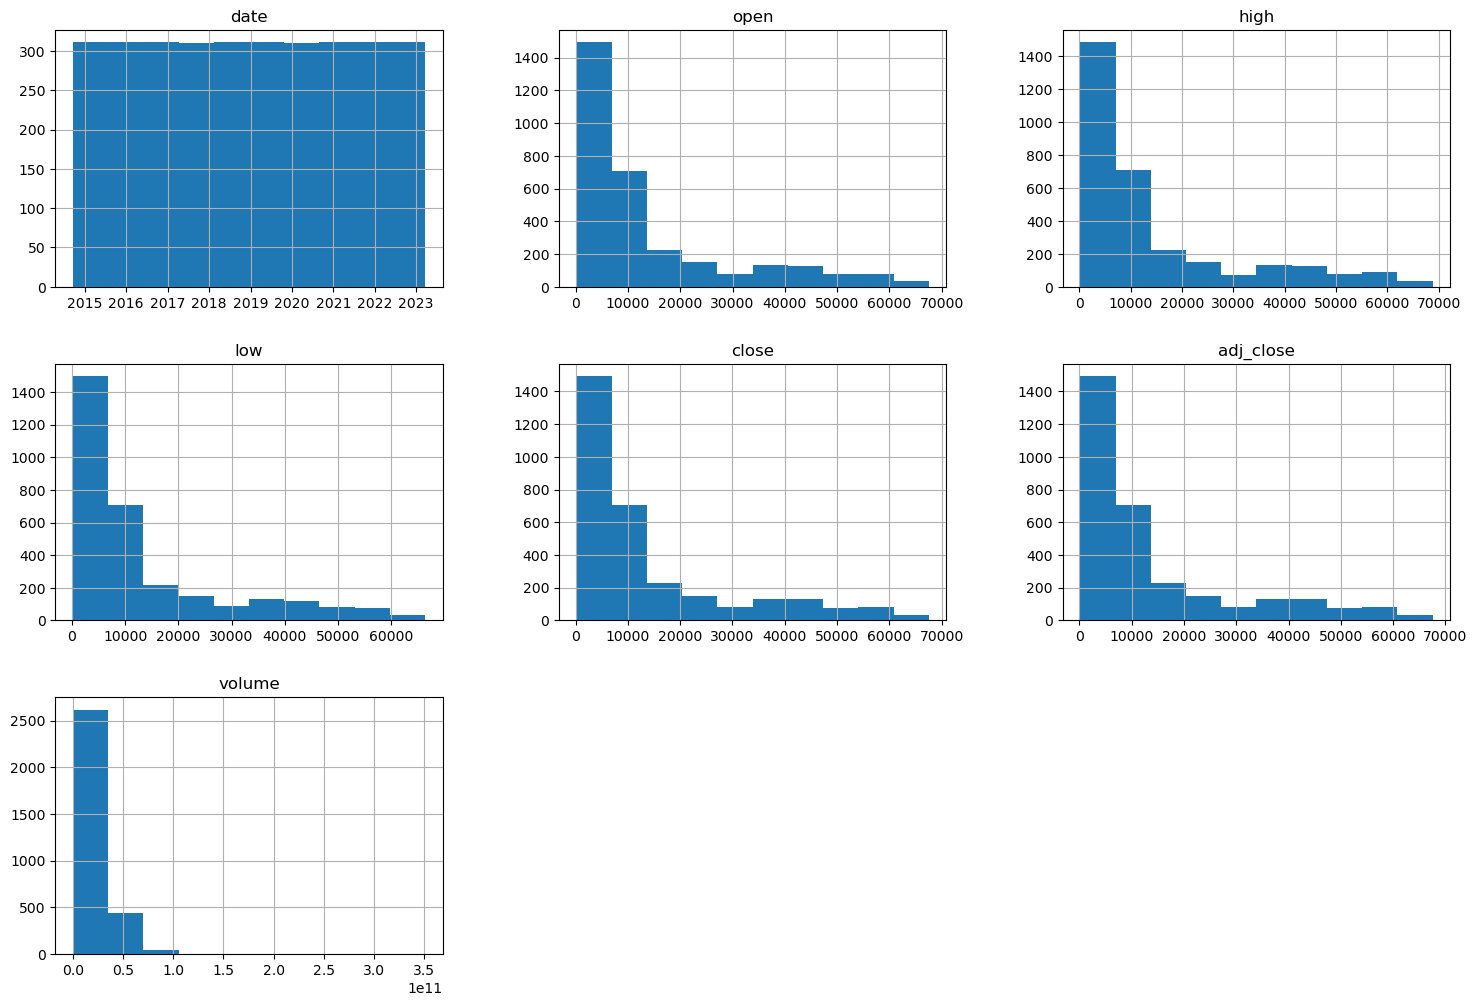

In [20]:
bitcoin_numeric = bitcoindf.select_dtypes(exclude = ['bool'])
bitcoin_numeric.hist(figsize = (18, 12))
plt.show()

In [21]:
bitcoindf.to_csv('../data/Bitcoin/BTC-USD-NEW.csv')